# Prepare the data for the bar plots

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.3f}'.format

df = pd.read_pickle('output/critical_long_format.pickle')

# transform seconds to hours
df['hours'] = df['secs'] / 3600

# rename values of the daytype for the plots
df['Daytype'] = 'A. Weekday'
df.loc[~df.is_weekday, 'Daytype'] = 'B. Saturdays & Sundays'

# rename values of the critical times
df['Critical'] = df.critical.replace( {
    True:'Critical (11:00-15:00)',
    False: 'Other (15:00-11:00)'})

# sort by the critical, so bars appear in the right order
df = df.sort_values('Critical')

# Probability of customer charging (and kWh per costumer) for mailed and not mailed customers during event days

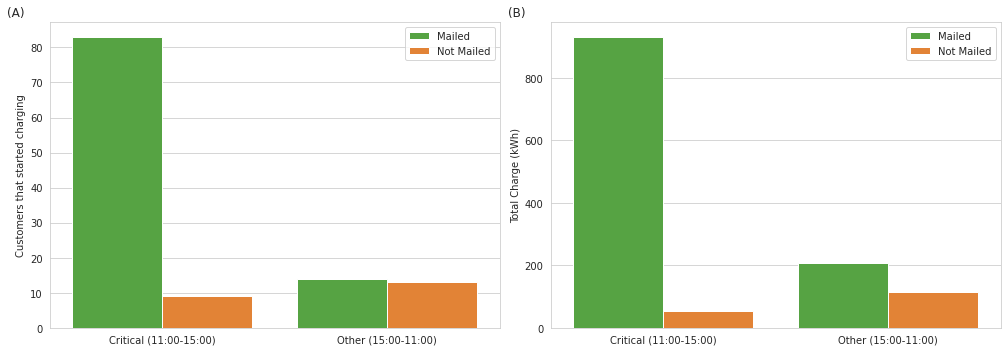

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette([ (0.3, 0.7, 0.2), (1.0, 0.5, 0.1), (0.2, 0.5, 0.8)])
hue_order=['Mailed', 'Not Mailed']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=False, )

#copy the dataframe to avoid conflicts with other plots
dfplot = df.copy()


# rename values of the condtion for the plots
dfplot['Customer'] = 'Not Mailed'
dfplot.loc[dfplot.mailed & dfplot.mailday,'Customer'] = 'Mailed'


#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10), sharey=True, )
sns.barplot(data=dfplot[dfplot.mailday], x="Critical", y="charge_started",  
            hue="Customer", hue_order=hue_order, estimator=sum, ax=ax1, ci=None)
sns.barplot(data=dfplot[dfplot.mailday], x="Critical", y="charge", 
            hue="Customer", hue_order=hue_order, estimator=sum, ax=ax2, ci=None)


ax1.set_ylabel('Customers that started charging')
ax2.set_ylabel('Total Charge (kWh)')
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title('(A)', y=1, x=-.075)
ax2.set_title('(B)', y=1, x=-.075)

ax1.legend().set_title('')
ax2.legend().set_title('')

plt.tight_layout()

# Probabilty of a customer charging including no-event days

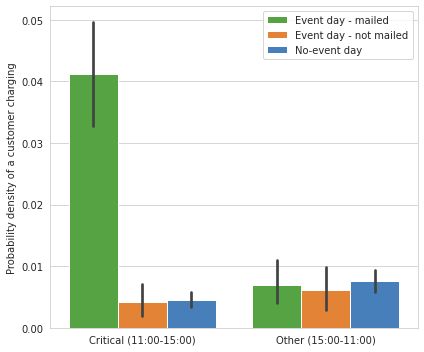

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_palette([ (0.3, 0.7, 0.2), (1.0, 0.5, 0.1), (0.2, 0.5, 0.8)])

fig, ax= plt.subplots(figsize=(6,5))


# order of legend
hue_order=['Event day - mailed', 'Event day - not mailed', 'No-event day']

#copy the dataframe to avoid conflicts with other plots
dfplot = df.copy()

# rename values of the daytype for the plots
dfplot['Condition'] = 'No-event day'
dfplot.loc[dfplot.mailed & dfplot.mailday,'Condition'] = 'Event day - mailed'
dfplot.loc[~dfplot.mailed & dfplot.mailday,'Condition'] = 'Event day - not mailed'

dfplot['charge'] = dfplot['charge'] / 1000


#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,10), sharey=True, )
sns.barplot(data=dfplot, x="Critical", y="charge_started", 
            hue="Condition", hue_order=hue_order, ax=ax, ci=95)#, ci=None)

ax.set_ylabel('Probability density of a customer charging')
ax.set_xlabel('')

ax.legend().set_title('')

plt.tight_layout()
